In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
%matplotlib inline

# Reading And Understanding Data

In [2]:
# read dataset
iris = pd.read_csv('../input/iris/Iris.csv', index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# rows and columns
iris.shape

(150, 5)

In [4]:
# 4 numerical and 1 categorical variable
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# check unique values in Species variable
iris.select_dtypes('object').nunique()

Species    3
dtype: int64

In [7]:
# different categories in Species variable
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# no null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

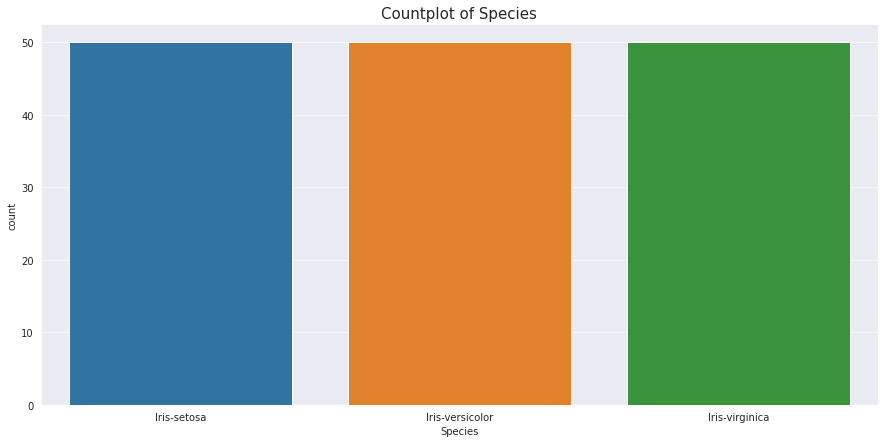

In [9]:
#Countplot of Species
plt.figure(figsize=[15,7])
sns.countplot(data=iris, x='Species')
plt.title('Countplot of Species', fontsize=15)
plt.show()

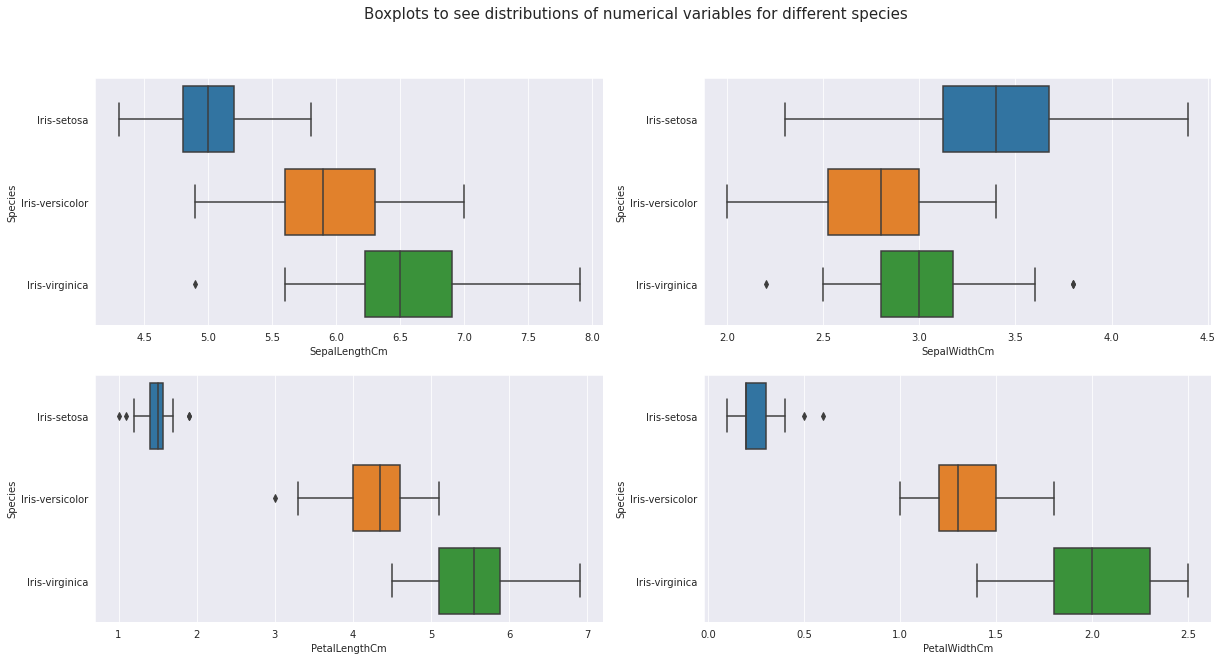

In [10]:
#Distributions and Scatterplot of numerical variables
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
sns.boxplot(data=iris, x="SepalLengthCm", y="Species")
plt.subplot(2,2,2)
sns.boxplot(data=iris, x="SepalWidthCm", y="Species")
plt.subplot(2,2,3)
sns.boxplot(data=iris, x="PetalLengthCm", y="Species")
plt.subplot(2,2,4)
sns.boxplot(data=iris, x="PetalWidthCm", y="Species")
plt.suptitle('Boxplots to see distributions of numerical variables for different species', fontsize=15)
plt.show()

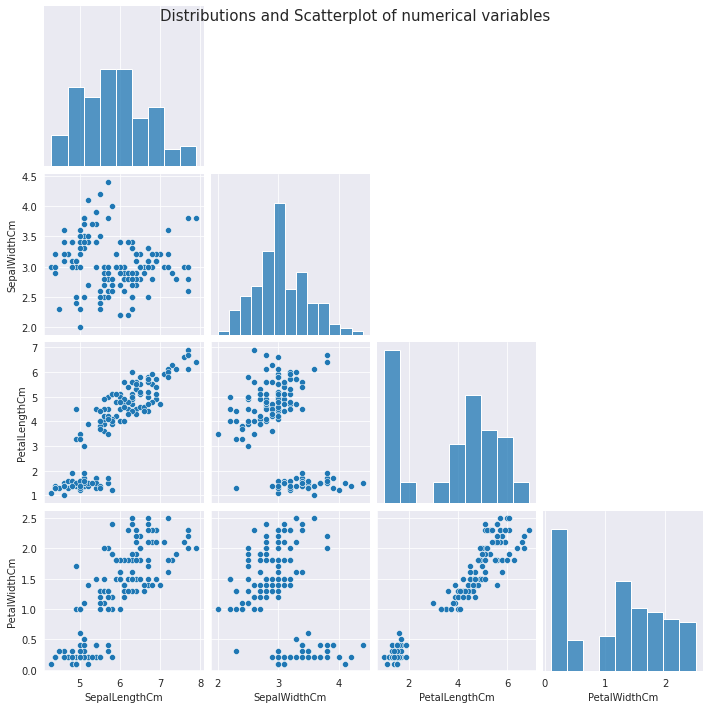

In [11]:
#Distributions and Scatterplot of numerical variables
sns.pairplot(iris, corner=True)
plt.suptitle('Distributions and Scatterplot of numerical variables', fontsize=15)
plt.show()

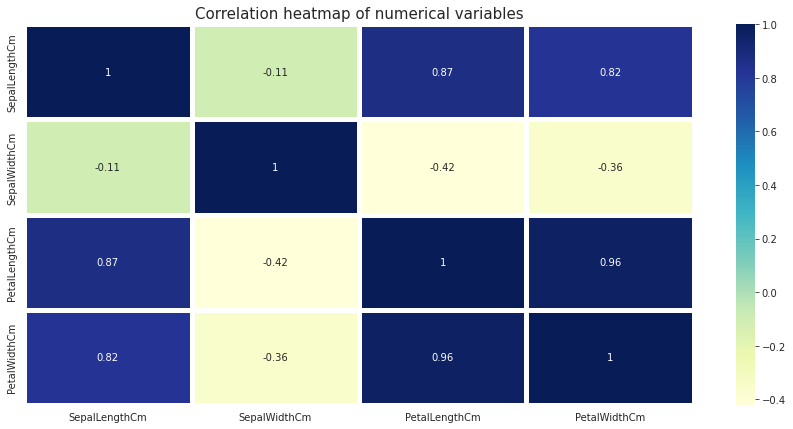

In [12]:
#Correlation heatmap of numerical variables
plt.figure(figsize=[15,7])
sns.heatmap(iris.corr(), annot=True, linewidths=5, cmap='YlGnBu')
plt.title('Correlation heatmap of numerical variables', fontsize=15)
plt.show()

# Model Building Univariate KMeans Clustering

In [13]:
# import KMeans library
from sklearn.cluster import KMeans

In [14]:
# list for elbow curve and silhouette scores iterations 
range_cluster = [2, 3, 4, 5, 6, 7, 8]

The silhouette score for 2 clusters is 0.7849191276722941
The silhouette score for 3 clusters is 0.6781848009879011
The silhouette score for 4 clusters is 0.6802368746882385
The silhouette score for 5 clusters is 0.6617714588583521
The silhouette score for 6 clusters is 0.6762379162905434
The silhouette score for 7 clusters is 0.68847253688101
The silhouette score for 8 clusters is 0.6869472878197405





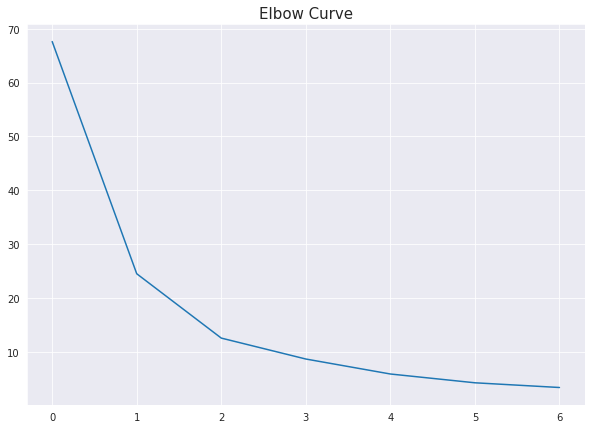

In [15]:
# using loop for n_clusters in range_cluster to plot elbow curve and check silhouette scores, to find ideal number of clusters
ssd_u = []

for num in range_cluster:
    kmeans_u = KMeans(n_clusters=num, max_iter=50)
    kmeans_u.fit(iris[['PetalLengthCm']])
    ssd_u.append(kmeans_u.inertia_)
    
    sil_avg_u = silhouette_score(iris[['PetalLengthCm']], kmeans_u.labels_)
    
    print('The silhouette score for {0} clusters is {1}'.format(num, sil_avg_u))

print('\n\n')
plt.figure(figsize=(10,7))
plt.plot(ssd_u)
plt.title('Elbow Curve', fontsize=15)
plt.show()

In [16]:
# final model with 3 clusters as seen in elbow curve and silhouette score

kmeans_u = KMeans(n_clusters=3)
y_pred = kmeans_u.fit_predict(iris[['PetalLengthCm']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [17]:
# cluster centers array
kmeans_u.cluster_centers_

array([[5.68809524],
       [1.464     ],
       [4.33965517]])

In [18]:
# create dataframe and add cluster variable
kmeans_udf = iris.copy()
kmeans_udf['Cluster'] = y_pred
kmeans_udf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


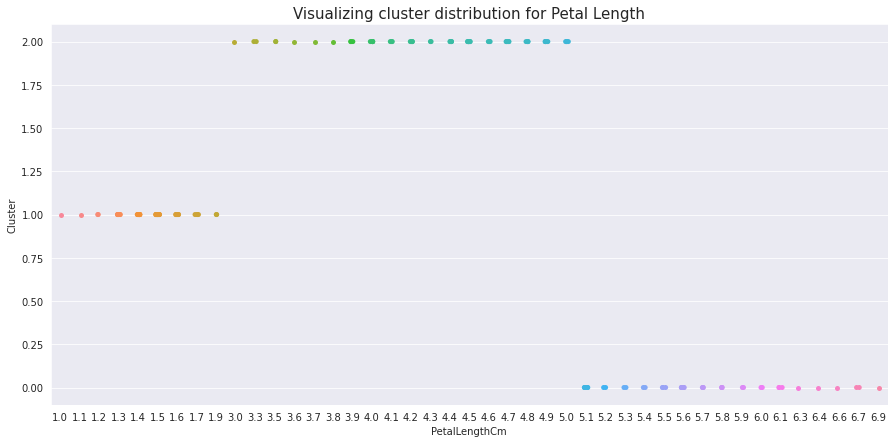

In [19]:
# Visualizing cluster distribution for Petal Length
plt.figure(figsize=[15,7])
sns.stripplot(data=kmeans_udf, x='PetalLengthCm', y='Cluster')
plt.title('Visualizing cluster distribution for Petal Length', fontsize=15)
plt.show()

# Feature Scaling

In [20]:
# Rescaling with MinMax Normalization
num_vars = iris.select_dtypes('float64')

scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(num_vars)
iris_scaled.shape

(150, 4)

In [21]:
# Converting scaled array to dataframe
iris_scaled = pd.DataFrame(iris_scaled)
iris_scaled.columns = [num_vars.columns]
iris_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# Model Building Bivariate KMeans Clustering

Silhouette Scores:
For 2 clusters, the silhouette score is 0.5622991442460264
Silhouette Scores:
For 3 clusters, the silhouette score is 0.46226806790827274
Silhouette Scores:
For 4 clusters, the silhouette score is 0.30348844841415107
Silhouette Scores:
For 5 clusters, the silhouette score is 0.2842591718641427
Silhouette Scores:
For 6 clusters, the silhouette score is 0.2535539073410466
Silhouette Scores:
For 7 clusters, the silhouette score is 0.2655873611073158
Silhouette Scores:
For 8 clusters, the silhouette score is 0.241983748198448





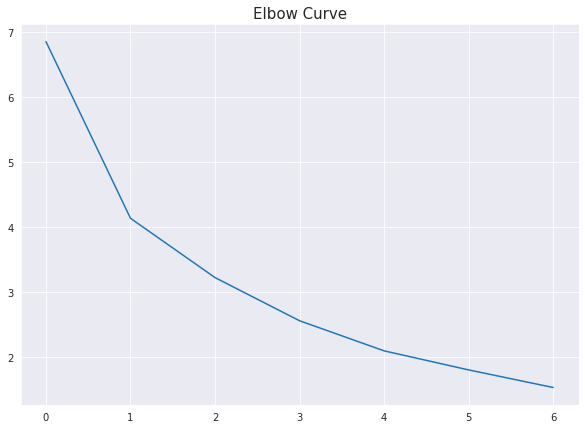

In [22]:
ssd_b = []

for i in range_cluster:
    kmeans_b = KMeans(n_clusters=i, max_iter=50)
    kmeans_b.fit(iris_scaled[['SepalLengthCm','SepalWidthCm']])
    
    ssd_b.append(kmeans_b.inertia_)
    
    sil_avg = silhouette_score(iris_scaled,kmeans_b.labels_)
    print('Silhouette Scores:')
    print(f'For {i} clusters, the silhouette score is {sil_avg}')

print('\n\n')
plt.figure(figsize=(10,7))
plt.plot(ssd_b)
plt.title('Elbow Curve', fontsize=15)
plt.show()

In [23]:
kmeans_b = KMeans(n_clusters=3)
y_pred = kmeans_b.fit_predict(iris_scaled[['SepalLengthCm','SepalWidthCm']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [24]:
kmeans_bdf = iris[['SepalLengthCm','SepalWidthCm']].copy()
kmeans_bdf['Cluster'] = y_pred
kmeans_bdf.head()

,SepalLengthCm,SepalWidthCm,Cluster
Id,,,
1,5.1,3.5,0
2,4.9,3.0,0
3,4.7,3.2,0
4,4.6,3.1,0
5,5.0,3.6,0


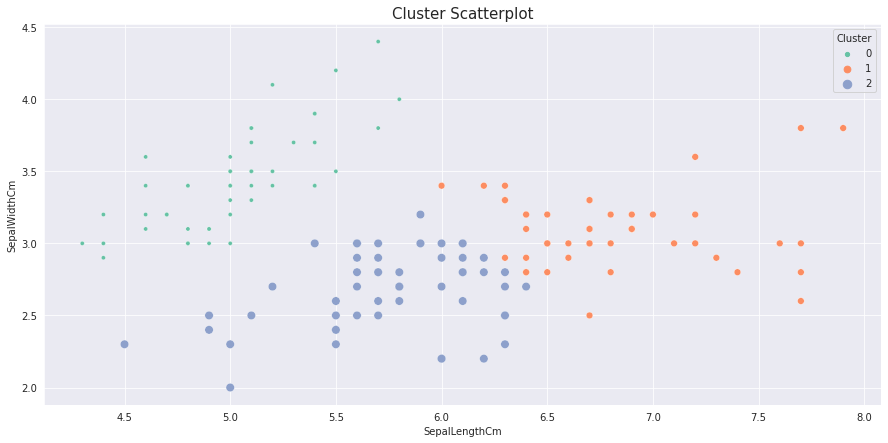

In [25]:
# Cluster Scatterplot with size for visual differentiation purpose
plt.figure(figsize=(15,7))
sns.scatterplot(data = kmeans_bdf, x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', size='Cluster', palette='Set2')
plt.title('Cluster Scatterplot', fontsize=15)
plt.show()

In [26]:
kmeans_b.cluster_centers_

array([[0.19897959, 0.60034014],
       [0.69562648, 0.45390071],
       [0.40483539, 0.28009259]])

# Model Building Multivariate KMeans Clustering

Silhouette Scores:
For n_clusters = 2, the silhouette score is 0.6294675561906644
Silhouette Scores:
For n_clusters = 3, the silhouette score is 0.5043188549150884
Silhouette Scores:
For n_clusters = 4, the silhouette score is 0.4446273300650682
Silhouette Scores:
For n_clusters = 5, the silhouette score is 0.35538315267369
Silhouette Scores:
For n_clusters = 6, the silhouette score is 0.3552714312369295
Silhouette Scores:
For n_clusters = 7, the silhouette score is 0.3442669727734702
Silhouette Scores:
For n_clusters = 8, the silhouette score is 0.33727960527001905





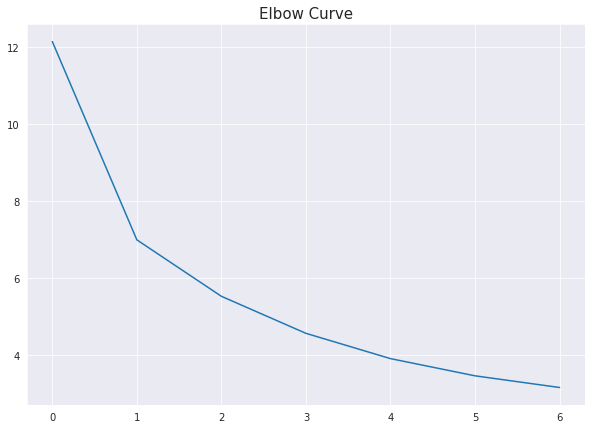

In [27]:
ssd = []

for num in range_cluster:
    kmeans = KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(iris_scaled)
    
    ssd.append(kmeans.inertia_)
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(iris_scaled, cluster_labels)
    print('Silhouette Scores:')
    print(f'For n_clusters = {num}, the silhouette score is {silhouette_avg}')

print('\n\n')
plt.figure(figsize=(10,7))
plt.plot(ssd)
plt.title('Elbow Curve', fontsize=15)
plt.show()

In [28]:
# final model with 3 clusters

kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(iris_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [29]:
kmeans.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [30]:
kmeans_mdf = iris.copy()
kmeans_mdf['Cluster'] = y_pred
kmeans_mdf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


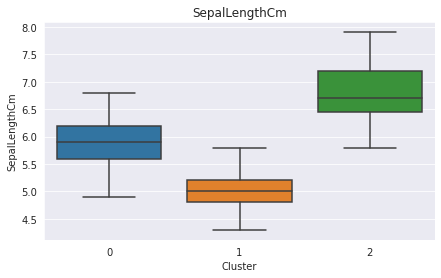

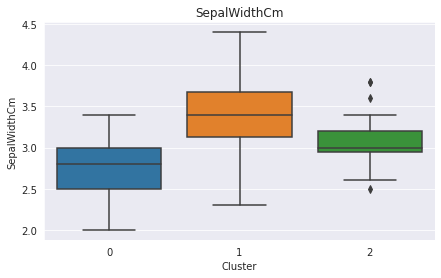

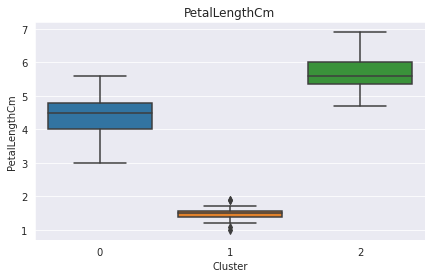

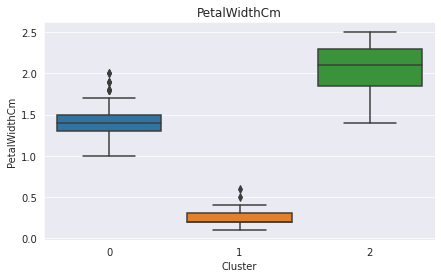

In [31]:
# creating boxplots using loops to check distribution of clusters. Using len -2 to remove and cluster and species categorical variables.
for i in range(len(kmeans_mdf.columns)-2):
    plt.figure(figsize=[7,4])
    sns.boxplot(x='Cluster', y=kmeans_mdf.columns[i], data=kmeans_mdf)
    plt.title(kmeans_mdf.columns[i])
    plt.show()

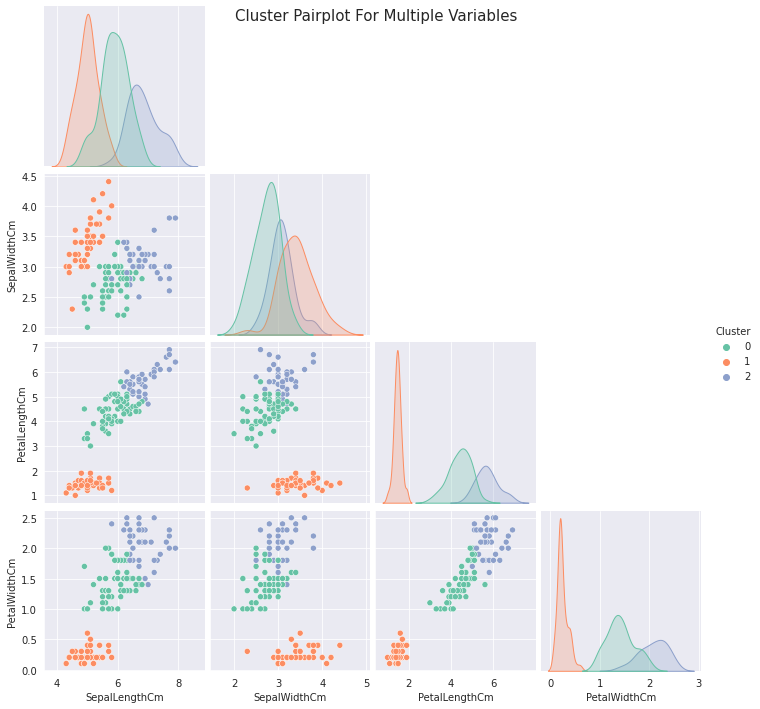

In [32]:
# Cluster Pairplot For Multiple Variables
sns.pairplot(kmeans_mdf, hue='Cluster', corner=True, palette='Set2')
plt.suptitle('Cluster Pairplot For Multiple Variables', fontsize=15)
plt.show()

# Conclusion

Among the variables used for all 3 types of KMeans clustering, 3 clusters appear to be the ideal number.